import prerequisite library

In [ ]:
import pandas as pd
from fbprophet import Prophet

read the csv file 

In [ ]:
df=pd.read_csv('/content/sales.csv')

display first 5 record

In [ ]:
df.head()

,s_id,name,contact_no,product_name,price,qty,discount,gst18,gst28,amount,date
0,36,RIYA SHAH,56,Main Engines,78000,8,31200,106704,0,699504,20/1/2019
1,32,JATIN BHATIYA,9265583610,Diesel Generator,95000,8,38000,129960,0,851960,8/2/2022
2,31,GIRISH BHATIYA,9824749431,Diesel Generator,95000,8,38000,129960,0,851960,8/2/2022
3,29,PRITESH BHATIYA,9033174261,Main Engines,78000,6,23400,80028,0,524628,8/2/2022
4,30,BRIJESH BHAI,9033174261,Diesel Generator,95000,8,38000,129960,0,851960,8/2/2022


check any colum is null or not

In [ ]:
df.isnull().sum()

s_id            0
name            0
contact_no      0
product_name    0
price           0
qty             0
discount        0
gst18           0
gst28           0
amount          0
date            0
dtype: int64

chekc the data types of the all colum flied

In [ ]:
df.dtypes

s_id             int64
name            object
contact_no      object
product_name    object
price            int64
qty              int64
discount         int64
gst18            int64
gst28            int64
amount           int64
date            object
dtype: object

convert the data colum in datetime format

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.dtypes

s_id                     int64
name                    object
contact_no              object
product_name            object
price                    int64
qty                      int64
discount                 int64
gst18                    int64
gst28                    int64
amount                   int64
date            datetime64[ns]
dtype: object

display first 5 record on the dataset

In [ ]:
df.head()

,amount,date
0,699504,2019-01-20
1,851960,2022-08-02
2,851960,2022-08-02
3,524628,2022-08-02
4,851960,2022-08-02


### **data preprocessing**

drop the colums 

In [ ]:
df.drop(['contact_no','product_name','price','qty','discount','gst18','gst28'], axis=1, inplace=True)

In [ ]:
df.head()

,amount,date
0,699504,2019-01-20
1,851960,2022-08-02
2,851960,2022-08-02
3,524628,2022-08-02
4,851960,2022-08-02


In [ ]:
df.columns=['y','ds']
df.head()

,y,ds
0,699504,2019-01-20
1,851960,2022-08-02
2,851960,2022-08-02
3,524628,2022-08-02
4,851960,2022-08-02


In [ ]:
m=Prophet(interval_width=0.95)

In [ ]:
training_run=m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


evulate the model

In [ ]:
future=m.make_future_dataframe(periods=200,freq='D')

In [ ]:
future

,ds
0,2019-01-09
1,2019-01-15
2,2019-01-20
3,2019-02-20
4,2019-03-20
...,...
210,2023-04-16
211,2023-04-17
212,2023-04-18
213,2023-04-19


forecastig future sales value 

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-09,1.513550e+06,-6.396861e+05,2.141196e+06,1.513550e+06,1.513550e+06,-7.549220e+05,-7.549220e+05,-7.549220e+05,-7.492421e+05,-7.492421e+05,-7.492421e+05,-5.679902e+03,-5.679902e+03,-5.679902e+03,0.0,0.0,0.0,7.586276e+05
1,2019-01-15,1.514187e+06,-8.624508e+05,1.730359e+06,1.514187e+06,1.514187e+06,-1.037783e+06,-1.037783e+06,-1.037783e+06,-7.719206e+05,-7.719206e+05,-7.719206e+05,-2.658621e+05,-2.658621e+05,-2.658621e+05,0.0,0.0,0.0,4.764044e+05
2,2019-01-20,1.514718e+06,-5.759286e+05,2.064020e+06,1.514718e+06,1.514718e+06,-8.152148e+05,-8.152148e+05,-8.152148e+05,-8.645493e+05,-8.645493e+05,-8.645493e+05,4.933450e+04,4.933450e+04,4.933450e+04,0.0,0.0,0.0,6.995035e+05
3,2019-02-20,1.518012e+06,-7.746111e+05,1.767910e+06,1.518012e+06,1.518012e+06,-1.041582e+06,-1.041582e+06,-1.041582e+06,-7.492421e+05,-7.492421e+05,-7.492421e+05,-2.923401e+05,-2.923401e+05,-2.923401e+05,0.0,0.0,0.0,4.764299e+05
4,2019-03-20,1.520987e+06,-6.954995e+05,1.923412e+06,1.520987e+06,1.520987e+06,-9.963884e+05,-9.963884e+05,-9.963884e+05,-7.492421e+05,-7.492421e+05,-7.492421e+05,-2.471464e+05,-2.471464e+05,-2.471464e+05,0.0,0.0,0.0,5.245985e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2023-04-16,1.679082e+06,-1.942697e+06,8.501697e+05,1.679082e+06,1.679082e+06,-2.238909e+06,-2.238909e+06,-2.238909e+06,-8.645493e+05,-8.645493e+05,-8.645493e+05,-1.374359e+06,-1.374359e+06,-1.374359e+06,0.0,0.0,0.0,-5.598261e+05
211,2023-04-17,1.679189e+06,2.943363e+06,5.737134e+06,1.679189e+06,1.679189e+06,2.669971e+06,2.669971e+06,2.669971e+06,4.343050e+06,4.343050e+06,4.343050e+06,-1.673079e+06,-1.673079e+06,-1.673079e+06,0.0,0.0,0.0,4.349160e+06
212,2023-04-18,1.679295e+06,-2.433524e+06,2.585787e+05,1.679295e+06,1.679295e+06,-2.733249e+06,-2.733249e+06,-2.733249e+06,-7.719206e+05,-7.719206e+05,-7.719206e+05,-1.961329e+06,-1.961329e+06,-1.961329e+06,0.0,0.0,0.0,-1.053954e+06
213,2023-04-19,1.679401e+06,-2.695852e+06,-7.468627e+03,1.679401e+06,1.679401e+06,-2.981753e+06,-2.981753e+06,-2.981753e+06,-7.492421e+05,-7.492421e+05,-7.492421e+05,-2.232511e+06,-2.232511e+06,-2.232511e+06,0.0,0.0,0.0,-1.302352e+06


write the file in csv format

In [ ]:
forecast.to_csv("salespredict.csv",index=False)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

represet the sales forecasting in the chart

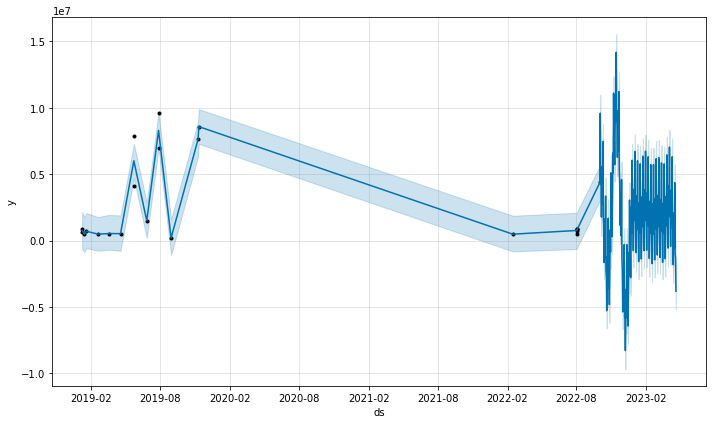

In [ ]:
plot1=m.plot(forecast)

represent the sales of weel;y ,yearly,day wise

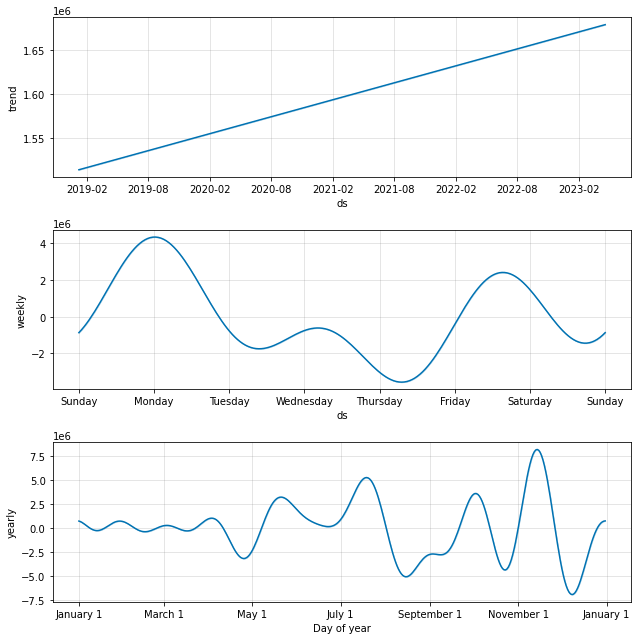

In [ ]:
plot2=m.plot_components(forecast)